## Exploratory Data Analysis
***

**EDA** is a technique primarily used to see what data can reveal the hidden story and provides a better understanding of dataset variables and the relationships between them.

Some techniques and statistical functions thata can be perform with EDA tools include:

   - Clustering and dimension reduction techniques, which help create graphical 
      displays of high-dimensional data containing many variables.
      
   - Univariate visualization of each field in the raw dataset, with summary statistics.
    
   - Bivariate visualizations and summary statistics that allow you to assess 
      the relationship between each variable in the dataset and the target variable you’re looking at.
    
   - Multivariate visualizations, for mapping and understanding interactions between different fields in the data.

***
***
In this notebook, I tried to cover all the EDA steps to approach any new dataset with logial explenation.


I used four dataset: <br>
<ol>
<li>   Titanic dataset (taken from kaggle)</li>
<li>   Iris dataset (inbulit dataset from seaborn library)</li>
<li>   Flights dataset (inbulit dataset from seaborn library)</li>
<li>   Tips dataset (inbulit dataset from seaborn library)</li>
</ol>

***
***

In [1]:
import pandas as pd

# linear Algebra
import numpy as np

# visualization library
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

file_path = 'C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass1/Lukas/Titanic.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
351,1243,0,2,"Stokes, Mr. Philip Joseph",male,25.0,0,0,F.C.C. 13540,10.5000,NaN,S
105,997,0,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.5250,NaN,S
143,1035,0,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.0000,NaN,S
264,1156,0,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,C.A. 34644,12.7375,NaN,C
330,1222,1,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
## there are 86 missing values in Age 
(327/418)*100
## and 78 % missing values of cabin 
## 1 missing value of fare

78.22966507177034

In [8]:
df.describe()  ## hear we get insights on numerical columns only 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
## if i want every value to be rounded to 2 digit then 
np.round(df.describe(), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,0.36,2.27,30.27,0.45,0.39,35.63
std,120.81,0.48,0.84,14.18,0.90,0.98,55.91
min,892.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,0.00,1.00,21.00,0.00,0.00,7.90
50%,1100.50,0.00,3.00,27.00,0.00,0.00,14.45
75%,1204.75,1.00,3.00,39.00,1.00,0.00,31.50
max,1309.00,1.00,3.00,76.00,8.00,9.00,512.33


In [10]:
np.round(df.describe()['Pclass'], 2)

count    418.00
mean       2.27
std        0.84
min        1.00
25%        1.00
50%        3.00
75%        3.00
max        3.00
Name: Pclass, dtype: float64

In [11]:
## cheaking if any duplicate values
df.duplicated().sum()

0

In [12]:
## cheaking the correlation of columns 
df.corr()

C:\Users\G good\AppData\Local\Temp\ipykernel_13436\1213907300.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [13]:
# df.corr()['Survived']

## if i want in terms of percentage then 
np.round(df.corr()['Survived']*100, 2)

C:\Users\G good\AppData\Local\Temp\ipykernel_13436\835739483.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr()['Survived']*100, 2)


PassengerId     -2.32
Survived       100.00
Pclass         -10.86
Age             -0.00
SibSp            9.99
Parch           15.91
Fare            19.15
Name: Survived, dtype: float64

In [14]:
## from this we can clearly see that survived has strong corrleation with fare of 19 %
## that means if fare is high chance of survive is also high 

## Similarly with the Parch 

## Also Survived has strong inverse corrleation with Pclass  -- 10 % relation 
## that means lower the Pclass value the chance of survival is more 

In [15]:
# df.corr()["Age"]

# in terms of percentage 

np.round(df.corr()["Age"]*100, 2)

C:\Users\G good\AppData\Local\Temp\ipykernel_13436\1770416072.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr()["Age"]*100, 2)


PassengerId     -3.41
Survived        -0.00
Pclass         -49.21
Age            100.00
SibSp           -9.16
Parch           -6.12
Fare            33.79
Name: Age, dtype: float64

In [16]:
## hear Age and Fare is highly corrleated   almost 33 %
## that means if age is increasing the fare is also increasing


## also if age is Increasing then Pclass is decreasing
## i.e class 1 will be having older people 


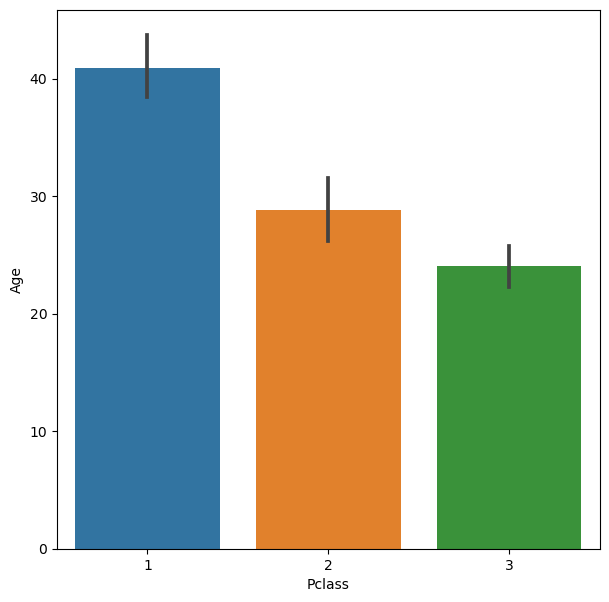

In [18]:
## we will cross verify this by plotting the graph between Pclass and Age
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read the CSV file into the 'df' DataFrame
plt.figure(figsize=(7, 7))
sns.barplot(x='Pclass', y='Age', data=df)
plt.show()


***
## EDA -- Univarient Analysis 
#### ( Analysis of singel column )
***

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
df.Parch.value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [21]:
df["SibSp"].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [22]:
df["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [23]:
## Categorical columns : Survived, Pclass, SibSp, Parch, Cabin

## Numerical columns : Age, Fare, Ticket

### Working with categorical Data

####  countplot ( gives the frequency of category data ) and piechart ( gives the % of category data ) 

In [24]:
# Categorical data can be visualized using only a  bar chart and pie chart. 
# The bar chart is used when measuring for frequency (or mode) while 
# The pie chart is used when dealing with percentages.

In [25]:
### using numpy on Survived Columns We can check how many rows lie in particular category 

df["Survived"].value_counts()


0    266
1    152
Name: Survived, dtype: int64

<Axes: >

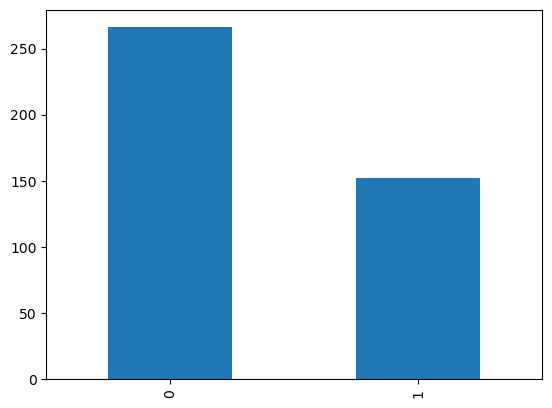

In [26]:
df["Survived"].value_counts().plot(kind = "bar")

# from this we can say that dide people are more than survived people 

<Axes: ylabel='Survived'>

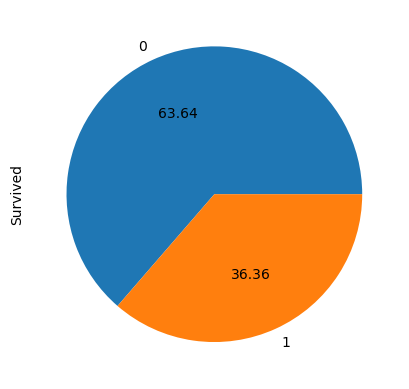

In [27]:
## interms of % we can see the category 

df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

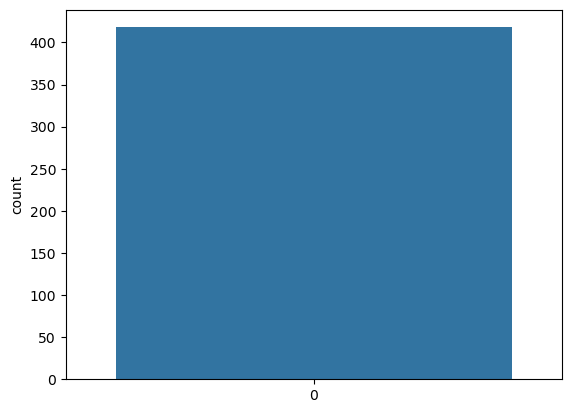

In [28]:
## we can plot them using seaborn 

sns.countplot(df['Survived'])
plt.show()

<Axes: ylabel='count'>

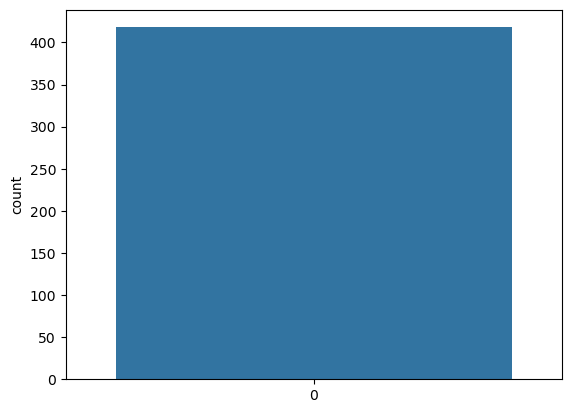

In [29]:
sns.countplot(df["Pclass"])

## from this we can clearly see that 3rd class people are highest 

<Axes: ylabel='Pclass'>

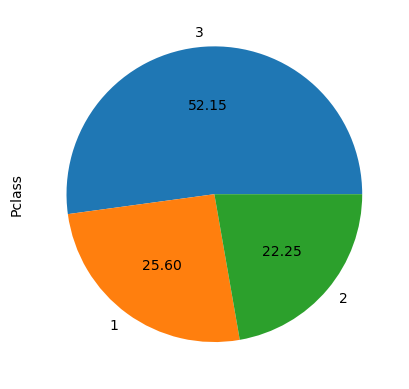

In [30]:
df['Pclass'].value_counts().plot(kind = "pie", autopct = "%.2f")

# info in terms of precentage

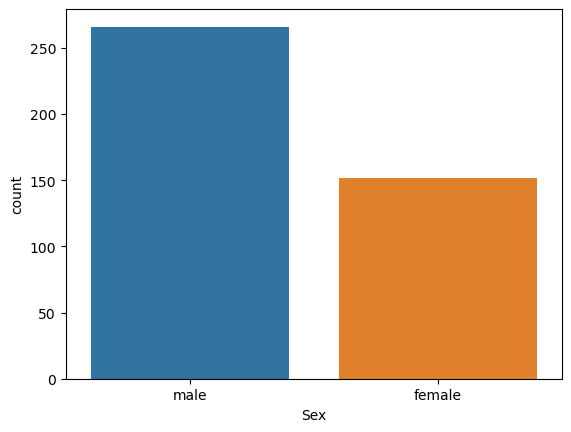

In [33]:
sns.countplot(x='Sex', data=df)
plt.show()

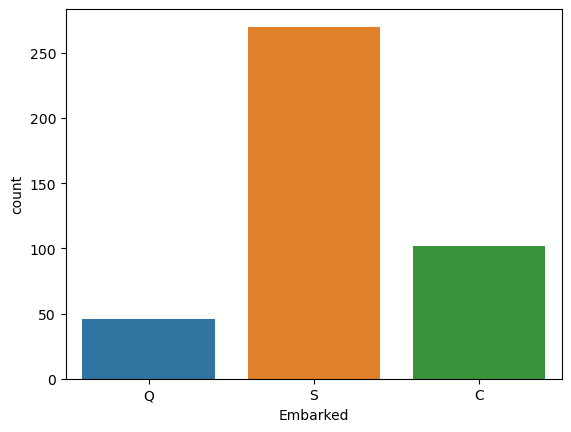

In [35]:
sns.countplot(x='Embarked', data=df)
plt.show()

In [36]:
## in categorical data 

## we can olny find out the frequency of the count
## also in term of % using pie chart 

### Working with Numerical Data

### a. Histogram 

In [37]:
## In numerical data we try to divide our data into range 
## like in Age we try to divide in range of 0-10, 10-20, 20-30 .....  we call range as bins

# that means we are looking the distribution of the data into numerical col (if we have numerical data and continious data)

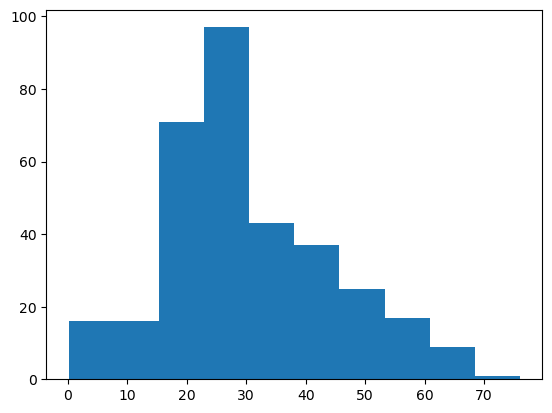

In [38]:
## from making histogram we use matplotlib.pyplot 
plt.hist(df["Age"])
plt.show()


## this is showing that small age people and  high age people are less as compare to 
## middle age people..   age betweeen [20, 30] are highest 

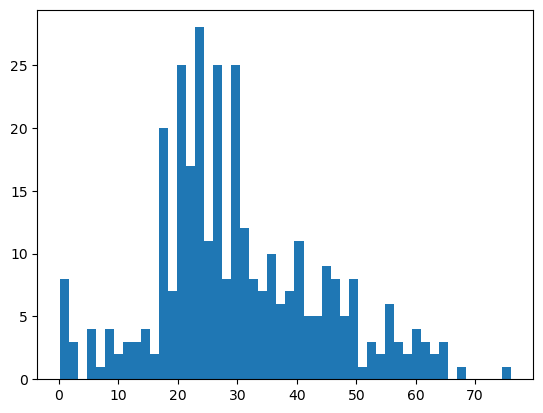

In [39]:
## we can change the bins in histogram
plt.hist(df["Age"], bins = 50)
plt.show()

### b. Distplot

C:\Users\G good\AppData\Local\Temp\ipykernel_13436\4085418590.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

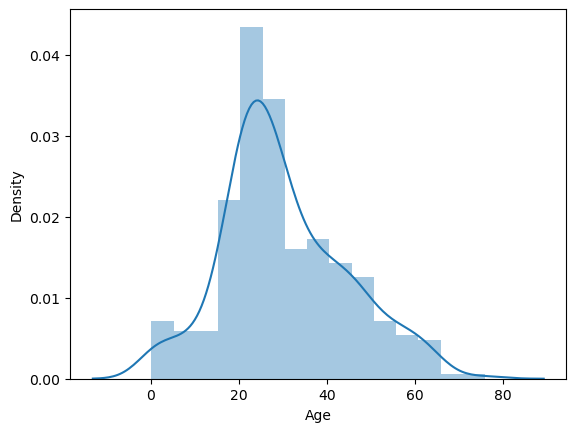

In [40]:
## Displot is same as histogram just added kde
## kde = Kernal density destribution 


## kde == Pdf (probablity density function )
## that means if i take random person of x age then it will give me the probablity of finding that person

sns.distplot(df["Age"])

## dis plot also tells the skewness of data

## skewness can also be find out by 
## df["Age"].skew()   ... if it is 1 then data is equally distributed

<Axes: xlabel='Age', ylabel='Density'>

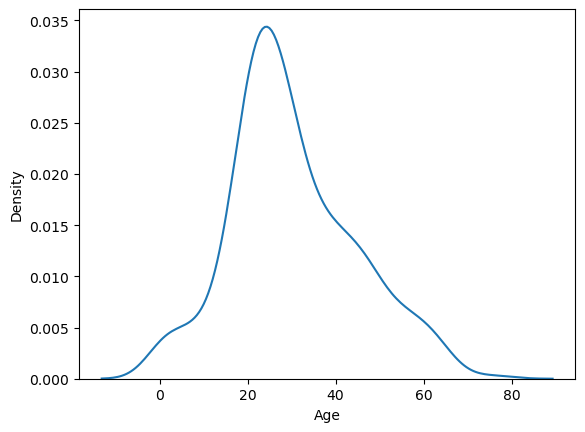

In [41]:
sns.kdeplot(df["Age"]) 
## or
## sns.distplot(df["Age"], hist =False)

In [42]:
df["Age"].skew()

0.4573612871503845

### c. Boxplot

<Axes: >

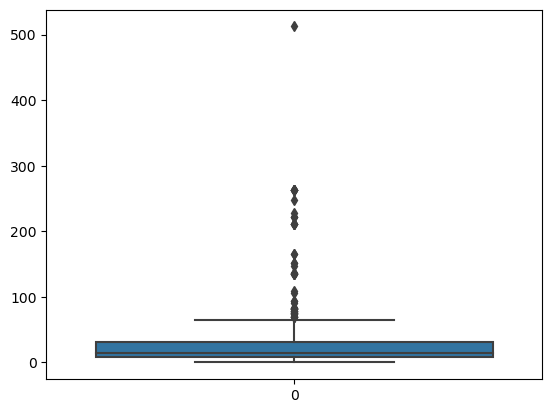

In [43]:
## It gives the 5 No summery 

## median == if we sort our date then the middle element is median 
## Q1 = this is that form data, below which 25 % of data is small   i.e. 25 percentile 
## Q3 = 75 percentile 
## minimum 
## maximum 


sns.boxplot(df["Fare"])


## from this we can clearly see that 500 fare is potential outlier

<Axes: >

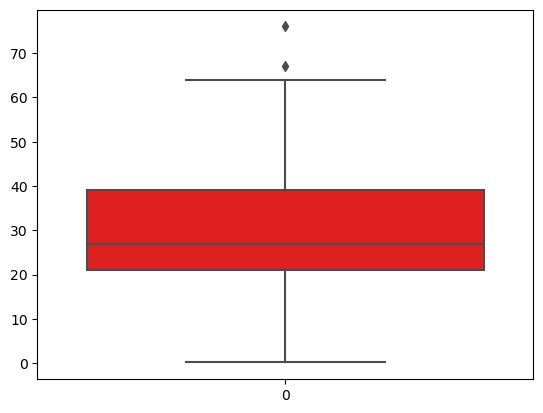

In [44]:
## Box plot of Age column 

sns.boxplot(df["Age"], color = "red")

## there are two potential outlyer

In [45]:
df["Age"].min()

0.17

In [46]:
df["Age"].max()

76.0

In [47]:
df["Age"].mean()

30.272590361445783

In [48]:
df["Age"].median()

27.0

## EDA - Bivarient Analysis / Multi-Varient Analysis
#### ( Bivarient =  Analysis of  two columns )
#### ( Multivariet = Alalysis of more than 2 columns )

In [49]:
## we will be using 4 different datasets 

In [52]:
file_path = 'C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass1/Lukas/tested.csv'
titanic = pd.read_csv(file_path)
titanic.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName,Formula,RuleSet,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,APL,2023-03-12,NaN,Queensland,Cairns,APL Cairns Cup,Dots,CombineRawAndWraps CombineSingleAndMulti,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Place,Name,Sex,Age,Equipment,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Points,Event
4,1,Grace Harding,F,16,Raw,J15-19,67.45,67.5,100,110,...,-87.5,-87.5,82.5,120,130,140,140,337.5,348.58,SBD


In [55]:
file_path = 'C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass1/Lukas/tips.csv' # this is dataset 0f hotel bill and tips given to waiter 
tips = pd.read_csv(file_path)
tips.head()

,created_utc,score,domain,id,title,author,ups,downs,num_comments,permalink,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.337440e+09,95,self.relationship_tips,tuqvq,Those little comments *do* matter.,Gimli_The_Dwarf,103,8,17,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,False,NaN,NaN,True,t3_tuqvq,http://www.reddit.com/r/relationship_tips/comm...,NaN
1,1.324572e+09,84,self.relationship_tips,nmr0g,Concerning a txt I just received...,LukeLukez,89,5,8,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,False,NaN,NaN,True,t3_nmr0g,http://www.reddit.com/r/relationship_tips/comm...,NaN
2,1.331331e+09,80,self.relationship_tips,qphe5,Dr. Seuss's take on love,loveydoveyideas,83,3,5,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,False,NaN,NaN,True,t3_qphe5,http://www.reddit.com/r/relationship_tips/comm...,NaN
3,1.334973e+09,72,self.relationship_tips,skpfv,Relationship Tip: Will solve pretty much every...,Pilot824,84,12,27,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,True,NaN,NaN,True,t3_skpfv,http://www.reddit.com/r/relationship_tips/comm...,NaN
4,1.371770e+09,67,self.relationship_tips,1grcz9,A heartbreakingly realistic essay on unequal r...,dediaadia,79,12,8,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,False,NaN,NaN,True,t3_1grcz9,http://www.reddit.com/r/relationship_tips/comm...,NaN


In [56]:
file_path = 'C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass1/Lukas/iris.csv'  # this is dataset of flowers and their species
iris = pd.read_csv(file_path)
iris.head()   

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [58]:
file_path = 'C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass1/Lukas/flights.csv'
flight = pd.read_csv(file_path)
flight.head()


,source,dest,airline,flights,onTimePerf,delayAvg,year
0,LHR,ORD,AA,2490,66.33,21.11,2010
1,LHR,ORD,BA,1413,57.63,23.30,2010
2,LHR,ORD,UA,2105,73.24,14.57,2010
3,LHR,ORD,VS,218,77.06,11.10,2010
4,LHR,LAX,AA,706,66.38,17.66,2010


## 1] Bar Plot - Numerical to Categorical

In [62]:
titanic.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName,Formula,RuleSet,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,APL,2023-03-12,NaN,Queensland,Cairns,APL Cairns Cup,Dots,CombineRawAndWraps CombineSingleAndMulti,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Place,Name,Sex,Age,Equipment,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Points,Event
4,1,Grace Harding,F,16,Raw,J15-19,67.45,67.5,100,110,...,-87.5,-87.5,82.5,120,130,140,140,337.5,348.58,SBD


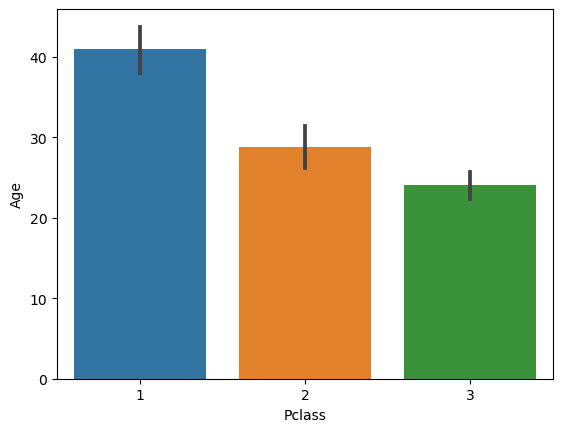

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the titanic dataset using pandas
file_path = 'C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass1/Lukas/titanic.csv'
titanic = pd.read_csv(file_path)

# Create a bar plot
sns.barplot(x="Pclass", y="Age", data=titanic)

# Show the plot
plt.show()


In [65]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [99]:
dots.sample(10)

,align,choice,time,coherence,firing_rate
695,sacc,T2,-200,12.8,36.537503
359,dots,T2,500,3.2,38.703894
210,dots,T2,-40,25.6,34.705882
687,sacc,T2,-220,0.0,44.249579
582,sacc,T1,200,0.0,10.458167
570,sacc,T1,160,0.0,20.368526
816,sacc,T2,200,25.6,29.950980
467,sacc,T1,-200,12.8,55.851347
115,dots,T1,300,3.2,47.740331
44,dots,T1,60,6.4,38.202934


C:\Users\G good\AppData\Local\Temp\ipykernel_13436\4157463539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dots["time"], bins = 25)


<Axes: xlabel='time', ylabel='Density'>

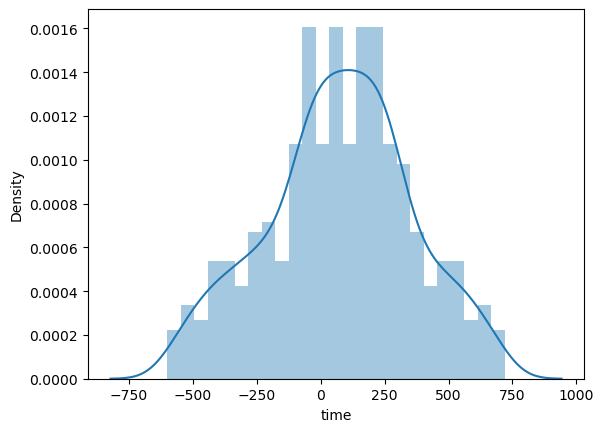

In [68]:
sns.distplot(dots["time"], bins = 25)

In [69]:
print( dots["time"].min() )
print( dots["time"].max() )

-600
720


<Axes: >

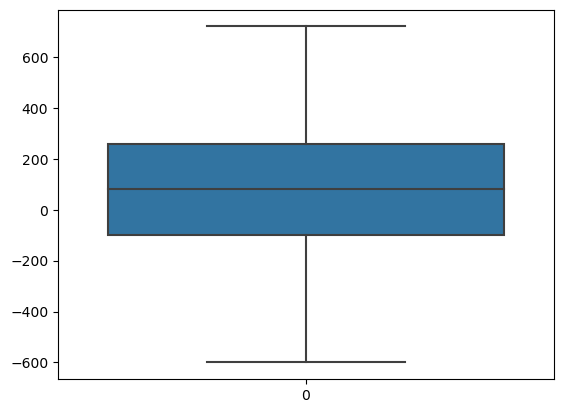

In [70]:
sns.boxplot(dots["time"])

In [71]:
dots["choice"].value_counts()

T2    430
T1    418
Name: choice, dtype: int64

In [72]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [73]:
dots.coherence.value_counts()

0.0     174
3.2     170
6.4     156
12.8    142
25.6    116
51.2     90
Name: coherence, dtype: int64

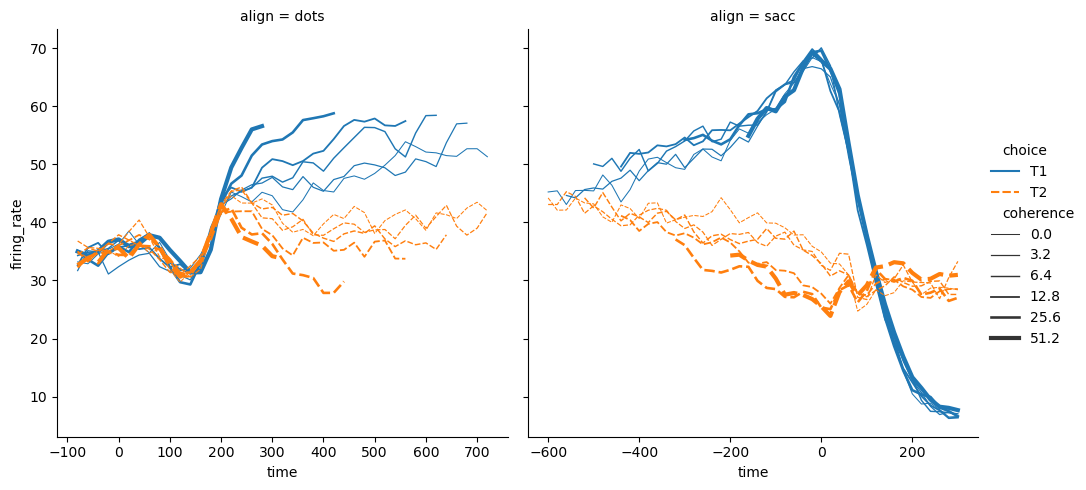

In [74]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [75]:
tips.head()

,created_utc,score,domain,id,title,author,ups,downs,num_comments,permalink,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.337440e+09,95,self.relationship_tips,tuqvq,Those little comments *do* matter.,Gimli_The_Dwarf,103,8,17,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,False,NaN,NaN,True,t3_tuqvq,http://www.reddit.com/r/relationship_tips/comm...,NaN
1,1.324572e+09,84,self.relationship_tips,nmr0g,Concerning a txt I just received...,LukeLukez,89,5,8,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,False,NaN,NaN,True,t3_nmr0g,http://www.reddit.com/r/relationship_tips/comm...,NaN
2,1.331331e+09,80,self.relationship_tips,qphe5,Dr. Seuss's take on love,loveydoveyideas,83,3,5,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,False,NaN,NaN,True,t3_qphe5,http://www.reddit.com/r/relationship_tips/comm...,NaN
3,1.334973e+09,72,self.relationship_tips,skpfv,Relationship Tip: Will solve pretty much every...,Pilot824,84,12,27,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,True,NaN,NaN,True,t3_skpfv,http://www.reddit.com/r/relationship_tips/comm...,NaN
4,1.371770e+09,67,self.relationship_tips,1grcz9,A heartbreakingly realistic essay on unequal r...,dediaadia,79,12,8,http://www.reddit.com/r/relationship_tips/comm...,...,False,NaN,t5_2sa5c,False,NaN,NaN,True,t3_1grcz9,http://www.reddit.com/r/relationship_tips/comm...,NaN


In [76]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_utc             995 non-null    float64
 1   score                   995 non-null    int64  
 2   domain                  995 non-null    object 
 3   id                      995 non-null    object 
 4   title                   995 non-null    object 
 5   author                  934 non-null    object 
 6   ups                     995 non-null    int64  
 7   downs                   995 non-null    int64  
 8   num_comments            995 non-null    int64  
 9   permalink               995 non-null    object 
 10  selftext                974 non-null    object 
 11  link_flair_text         1 non-null      object 
 12  over_18                 995 non-null    bool   
 13  thumbnail               0 non-null      float64
 14  subreddit_id            995 non-null    ob

In [81]:
import pandas as pd

file_path = 'C:/Users/G good/Desktop/Msc-CS/big d/Lab/Ass1/Lukas/tips.csv'
tips = pd.read_csv(file_path)

# Print column names
print(tips.columns)

# Print first few rows of the dataset
print(tips.head())

# Check occurrences of values in a specific column
if "time" in tips.columns:
    time_counts = tips["time"].value_counts()
    print(time_counts)
else:
    print("Column 'time' not found in the dataset.")


Index(['created_utc', 'score', 'domain', 'id', 'title', 'author', 'ups',
       'downs', 'num_comments', 'permalink', 'selftext', 'link_flair_text',
       'over_18', 'thumbnail', 'subreddit_id', 'edited',
       'link_flair_css_class', 'author_flair_css_class', 'is_self', 'name',
       'url', 'distinguished'],
      dtype='object')
    created_utc  score                  domain      id  \
0  1.337440e+09     95  self.relationship_tips   tuqvq   
1  1.324572e+09     84  self.relationship_tips   nmr0g   
2  1.331331e+09     80  self.relationship_tips   qphe5   
3  1.334973e+09     72  self.relationship_tips   skpfv   
4  1.371770e+09     67  self.relationship_tips  1grcz9   

                                               title           author  ups  \
0                Those little comments *do* matter.   Gimli_The_Dwarf  103   
1                Concerning a txt I just received...        LukeLukez   89   
2                           Dr. Seuss's take on love  loveydoveyideas   83   
3  

In [ ]:
The confusion matrix is used to tell you how many predictions were classified correctly or incorrectly. 
You are looking at a regression model, which gives you a continous output (not classification).

So when you run confusion_matrix(y_test, y_pred) it will throw the ValueError because it expected
class predictions, not floating point numbers.

Are you trying to predict classes, or really just a number output? 
If not, then you should not be using the confusion matrix.